Name : Heet Dhanuka

Roll no. : 34

Batch : B2

--------------------

AIM : To study and perform point-point processing operations used in image enhancement.

i) Digital neagtive

ii) Bit Plane Slicing

iii) Gray level Slicing

iv) Gamma-factor Transformation

v) Log Transformation

vi) Contract stretching

vii) Thresholding  



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing Libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
# Function for Digital Negative
def digital_negative(image):
  print("Original Image")
  cv2_imshow(image)
  negative = 255 - image
  print("\nDigital Negative")
  cv2_imshow(negative)

Original Image


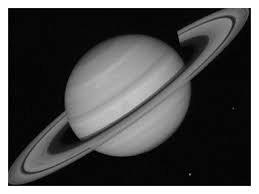


Digital Negative


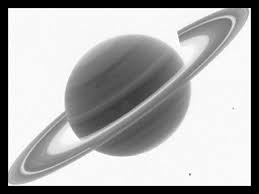

In [ ]:
# Digital Negative on Planet
image1 = cv2.imread('/content/drive/MyDrive/DIVP LAB/planet.jpg')
digital_negative(image1)

Original Image


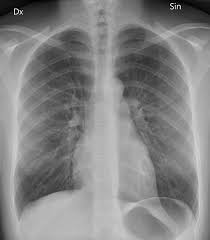


Digital Negative


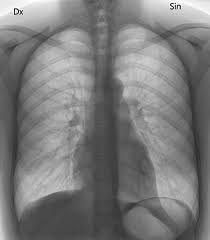

In [ ]:
# Digital Negative on xray
image2 = cv2.imread('/content/drive/MyDrive/DIVP LAB/xray.jpg')

digital_negative(image2)

Original Image


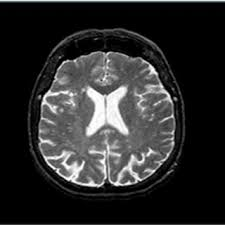


Digital Negative


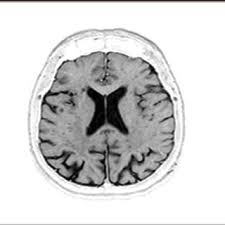

In [ ]:
# Digital Negative on mri
image3 = cv2.imread('/content/drive/MyDrive/DIVP LAB/mri.jpg')

digital_negative(image3)

Original Image


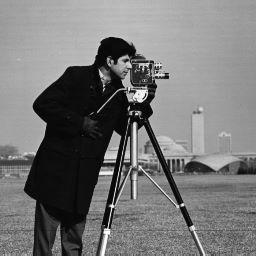


Digital Negative


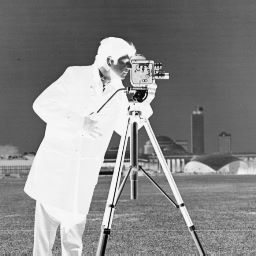

In [ ]:
# Digital Negative on cameraman
image4 = cv2.imread('/content/drive/MyDrive/DIVP LAB/cameraman.jpg')

digital_negative(image4)

Original Image


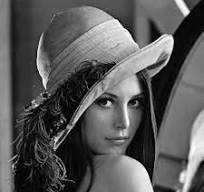


Digital Negative


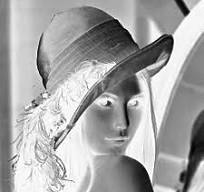

In [ ]:
# Digital Negative on lena
image5 = cv2.imread('/content/drive/MyDrive/DIVP LAB/LenaB&W.jpg')

digital_negative(image5)

In [ ]:
image6 = cv2.imread('/content/drive/MyDrive/DIVP LAB/sachin.jpg')


Original Image


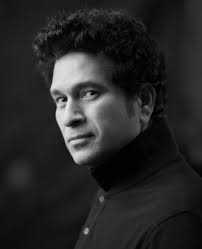


Bit Plane Slicing on Sachin image

Bit Plane 1


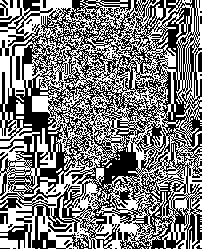


Bit Plane 2


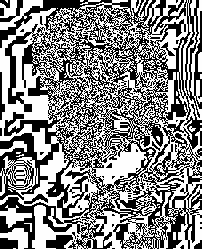


Bit Plane 3


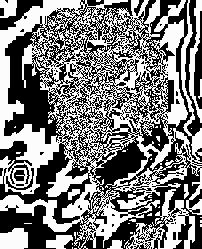


Bit Plane 4


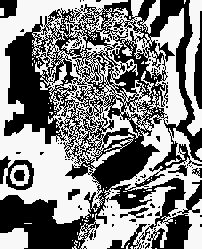


Bit Plane 5


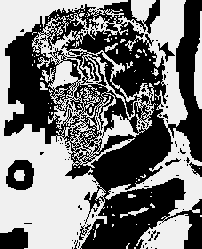


Bit Plane 6


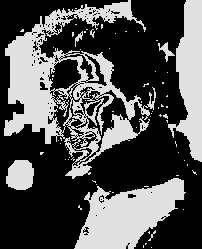


Bit Plane 7


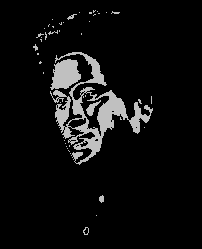


Bit Plane 8


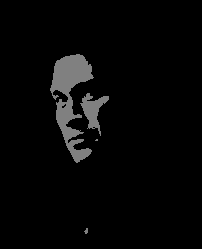

In [ ]:
# Function to perform bit plane slicing
def bit_plane_slicing(image):
    for i in range(8):
        plane = np.uint8(np.bitwise_and(image, 2**i)) * 255
        print(f'\nBit Plane {i+1}')
        cv2_imshow(plane)
print('Original Image')
cv2_imshow(image6)
print('\nBit Plane Slicing on Sachin image')
bit_plane_slicing(image6)

Original Image


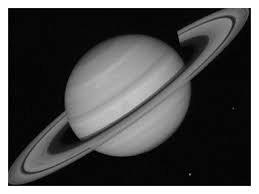


Gray Level Slicing Without Background


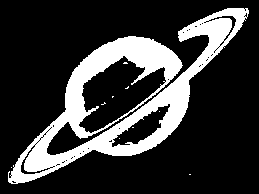


Gray Level Slicing With Background


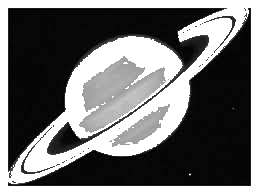

In [ ]:
# Gray level Slicing

print('Original Image')

planet = cv2.imread('/content/drive/MyDrive/DIVP LAB/planet.jpg')
cv2_imshow(planet)

# Without background
def gray_level_slicing_without_bg(img, a, b):
    img_copy = img.copy()
    rows, cols = img_copy.shape[:2]
    for i in range(rows):
        for j in range(cols):
            if a <= img_copy[i, j] <= b:
                img_copy[i, j] = 255
            else:
                img_copy[i, j] = 0
    return img_copy

# With background
def gray_level_slicing_with_bg(img, a, b):
    img_copy = img.copy()
    rows, cols = img_copy.shape[:2]
    for i in range(rows):
        for j in range(cols):
            if a <= img_copy[i, j] <= b:
                img_copy[i, j] = 255
    return img_copy


planet_gray = cv2.cvtColor(planet, cv2.COLOR_BGR2GRAY)
a = 74
b = 156

planet_without_bg = gray_level_slicing_without_bg(planet_gray, a, b)
print('\nGray Level Slicing Without Background')
cv2_imshow(planet_without_bg)


planet_with_bg = gray_level_slicing_with_bg(planet_gray, a, b)
print('\nGray Level Slicing With Background')
cv2_imshow(planet_with_bg)

In [ ]:
# Gamma-factor Transformation
def gamma_transformation(img, gammas):
  print("Original Image")
  cv2_imshow(img)

  for gamma in gammas:
    gamma_corrected = np.array(255*(img / 255) ** gamma, dtype = 'uint8')

  print("\nGamma Transformed Image")
  cv2_imshow(gamma_corrected)

Original Image


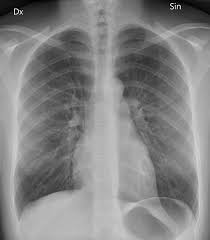


Gamma Transformed Image


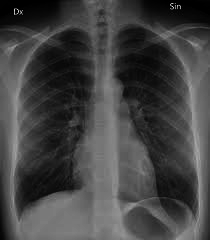

In [ ]:
# Gamma-factor Transformation on xray with different gammas
gamma_transformation(image2,[0.1,0.5,1.2,2.2])

Original Image


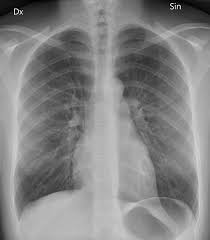


Gamma Transformed Image


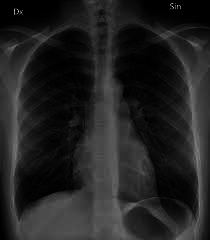

In [ ]:
# Gamma-factor Transformation on xray with different gammas
gamma_transformation(image2,[0.3,0.5,1.5,2.7,3.6])

In [ ]:
# Log Transformation
def log_transformation(img):
  print("Original Image")
  cv2_imshow(img)
  c = 255 / np.log(1 + np.max(img))
  log_image = c * (np.log(img + 1))
  print("\nLog Transformed Image")
  cv2_imshow(log_image)

Original Image


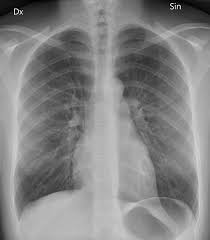

Log Transformed Image


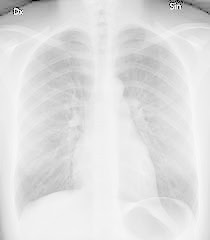

In [ ]:
# log transformation on xray
log_transformation(image2)

Original Image


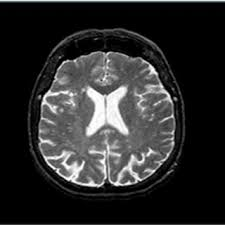

Log Transformed Image


<ipython-input-23-b4c9e289286b>:6: RuntimeWarning: divide by zero encountered in log
  log_image = c * (np.log(img + 1))


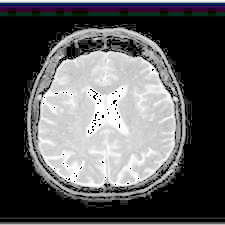

In [ ]:
# log transformation on mri
log_transformation(image3)

In [ ]:
# contract stretching
def contrast_stretching(img,a,b,v,W,L):
  print('Original Image')
  cv2_imshow(img)
  (h, w, d) = img.shape
  print(f'width={w}, height={h}, depth={d}')


  l = (v - 0) / (a - 0)
  m = (W - v) / (b - a)
  n = (L - W) / (L - b)

  for i in range(h):
      for j in range(w):
          for k in range(d):
              r = img[i, j, k]

              if r < a:
                  # First region: 0 to a
                  img[i, j, k] = int(l * r)
              elif a <= r <= b:
                  # Second region: a to b
                  img[i, j, k] = int(m * (r - a) + v)
              else:
                  # Third region: b to L
                  img[i, j, k] = int(n * (r - b) + W)

              # Ensure the pixel value is within the valid range (0-255)
              img[i, j, k] = np.clip(img[i, j, k], 0, 255)


  print('\nEnhanced Image')
  cv2_imshow(img)

Original Image


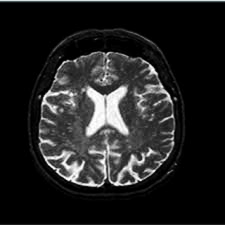

width=225, height=225, depth=3

Enhanced Image


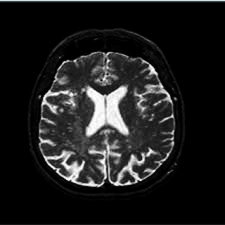

In [ ]:
# contrast stretching on mri
contrast_stretching( image3,70,160,50,155,255)

Original Image


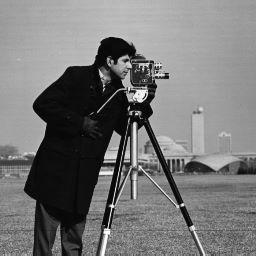

width=256, height=256, depth=3

Enhanced Image


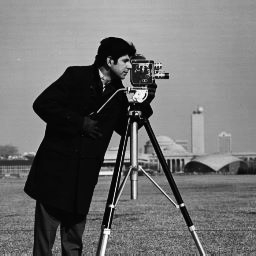

In [ ]:
# contrast stretching on cameraman
contrast_stretching( image4,70,160,50,155,255)

In [ ]:
# Thersholding
def threshold(img):
  print('Original Image')
  cv2_imshow(img)
  (h, w, d) = img.shape
  print(f'width={w}, height={h}, depth={d}')

  a=127
  L=256

  for i in range(h):
      for j in range(w):
          for k in range(d):
              r = img[i, j, k]

              if(r<a):
                  img[i, j, k]=0
              else:
                  img[i, j, k]= L-1

  # Ensure the pixel value is within the valid range (0-255)
              img[i, j, k] = np.clip(img[i, j, k], 0, 255)


  print('\nEnhanced Image')
  cv2_imshow(img)

Original Image


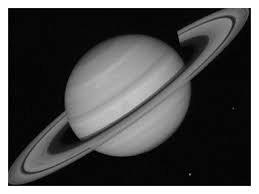

width=259, height=194, depth=3

Enhanced Image


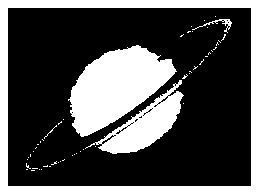

In [ ]:
# Thersholding on planet
threshold(image1)